Task 2: 1D FDTD CPML

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math as m

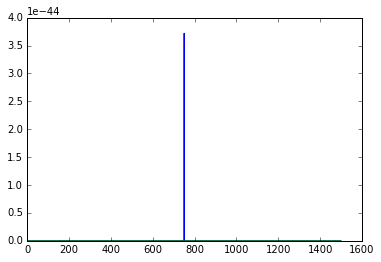

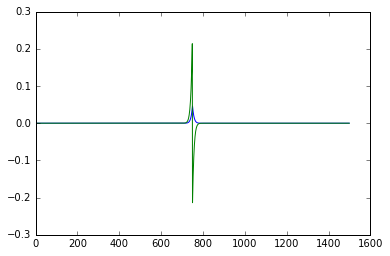

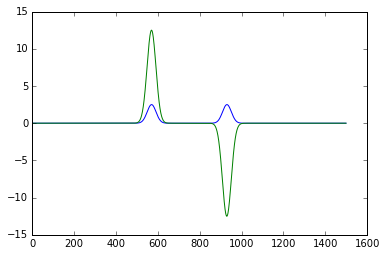

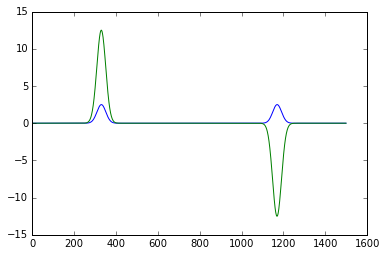

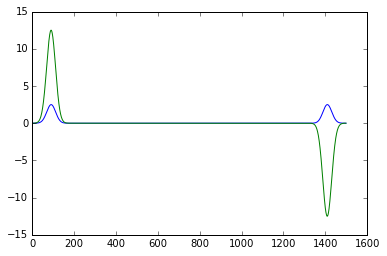

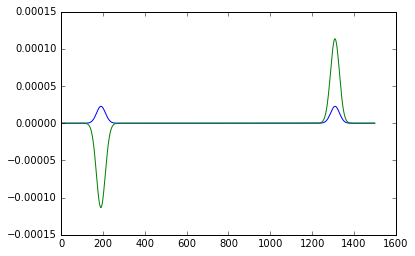

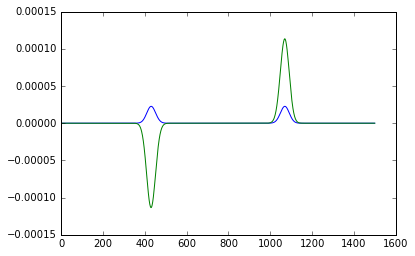

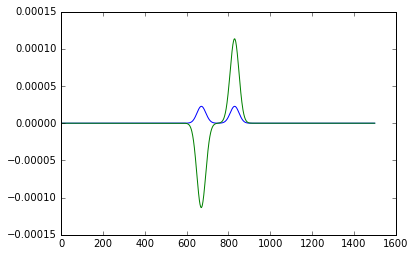

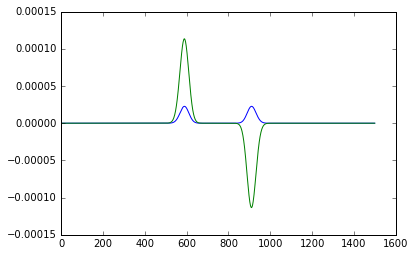

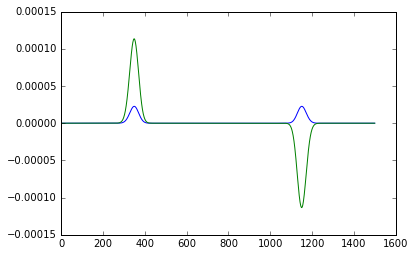

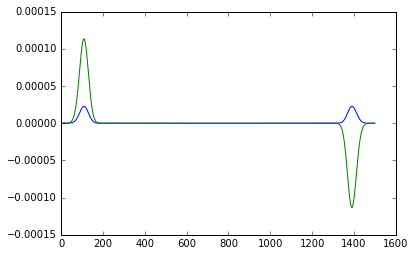

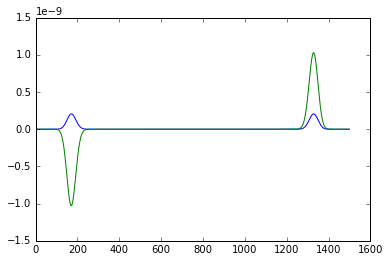

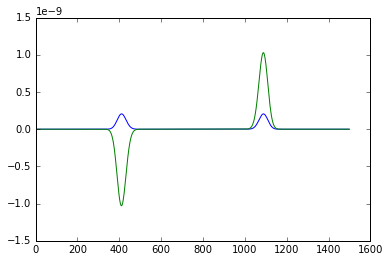

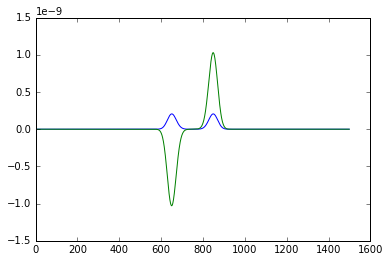

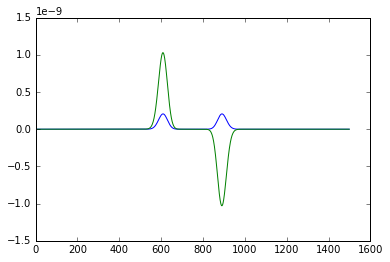

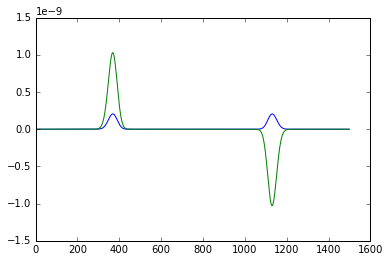

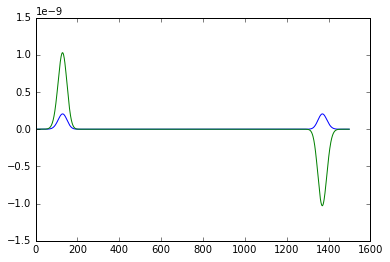

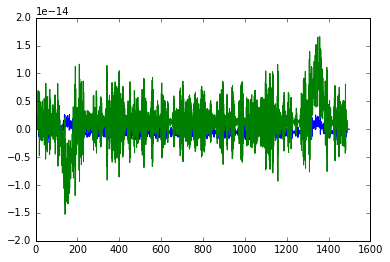

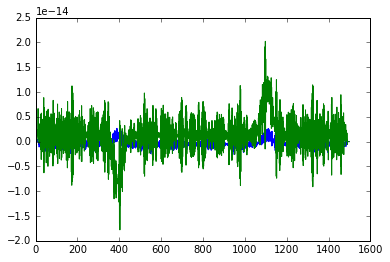

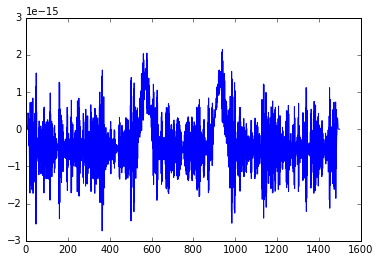

In [8]:
nx = 1500

#Dielectric distribution
epsilon = 25
eps= np.ones(nx)
eps[:] = epsilon

srcori = int(nx/2) #source is at center
srcwid = 30.0*np.sqrt(epsilon) #source width
srcdel = 10*srcwid #source delay
nt = int((nx*2.0+srcdel)*np.sqrt(epsilon))

imp0 = 337.0 #impedance

ez = np.zeros(nx)
hy = np.zeros(nx)

#CPML (Inan pp.228-230)
dx = 1.0
R0 = 1e-5
m1 = 2.85  # Order of polynomial grading
pml_width = 20.0
sxmax = -(m1+1)*np.log(R0)/2/imp0/(pml_width*dx)


sx = np.zeros(nx)
sxm = np.zeros(nx)
Phx = np.zeros(nx)
Pex = np.zeros(nx)

for mm in range(int(pml_width)):
    sx[mm+1] = sxmax*((pml_width-mm-0.5)/pml_width)**m1
    sxm[mm] = sxmax*((pml_width-mm)/pml_width)**m1  # Shifted to the right
    sx[nx-mm-1] = sxmax*((pml_width-mm-0.5)/pml_width)**m1  
    sxm[nx-mm-1] = sxmax*((pml_width-mm)/pml_width)**m1
# print(sx, sxm)
aex = np.exp(-sx*imp0)-1
bex = np.exp(-sx*imp0)
ahx = np.exp(-sxm*imp0)-1
bhx = np.exp(-sxm*imp0)


x = np.arange(0,nx-1,1)
x1 = np.arange(0,nx-1,1)

fignum = 0
for dt in range(0,nt):
    Phx[x] = bhx[x]*Phx[x] + ahx[x]*(ez[x+1] - ez[x])
    hy[x] = hy[x] + (ez[x+1] - ez[x])/imp0 + Phx[x]/imp0
    Pex[x1+1] = bex[x1+1]*Pex[x1+1] + aex[x1+1]*(hy[x1+1]-hy[x1])
    ez[x1+1] = ez[x1+1] + (hy[x1+1]-hy[x1])*imp0/eps[x1] +Pex[x1+1]*imp0/eps[x1]
        
    ez[srcori] += m.exp(-((dt-srcdel)*(dt-srcdel))/(srcwid*srcwid))

    plt.hold(True)
    if (dt % 1200 == 0 or dt == nt-2):
        fignum = fignum + 1
        plt.figure(fignum)
        plt.plot(ez)
        
        if (dt != nt-2):
            plt.plot(hy*imp0)